# Cálculo de Risco (VaR e ES)

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si

In [2]:
def read_fx_input_modificado(fx_name, data_fim): #Função da aula modificada para data fim
    df = si.get_data(fx_name, end_date = data_fim, index_as_date = True, interval = '1d')
    df = df.loc[:,['adjclose']]
    df.columns = ['price']
    return df

def calc_ret_pnl(df, hp): 
    df['return'] = (df['price']/df['price'].shift(hp) - 1) # Retorno
    df['PnL'] = df['price'] - df['price'].shift(hp) # Realizadoo
    return df

**VaR histórico com nível de confiança de 95% e HP=1 utilizando uma amostra de 500 dias.**

In [3]:
tamanho_hist = 500
n_conf = 0.95
ticker = 'USDBRL=X' #dolar
data = '30/04/2021'
hp = 1

preco_dolar = read_fx_input_modificado(fx_name=ticker, data_fim=data)
retorno_e_pnl = calc_ret_pnl(preco_dolar, hp=hp)
amostra_PnL = retorno_e_pnl.PnL.iloc[len(retorno_e_pnl)-tamanho_hist:len(retorno_e_pnl)]

alpha = 1 - n_conf
var = amostra_PnL.quantile(alpha)

print(f'Há uma probabilidade de {alpha*100:.2f}% que o dolar perca mais de R${- var:.2f} nos próximos {hp} dia(s)')

Há uma probabilidade de 5.00% que o dolar perca mais de R$0.10 nos próximos 1 dia(s)


**Calcule o ES histórico com nível de confiança de 97,5% e HP=1 utilizando uma amostra de 1000 dias.**

In [4]:
tamanho_hist = 1000
n_conf = 0.975
ticker = 'USDBRL=X' #dolar
data = '30/04/2021'
hp = 1

preco_dolar = read_fx_input_modificado(fx_name=ticker, data_fim=data)
retorno_e_pnl = calc_ret_pnl(preco_dolar, hp=hp)
amostra_PnL = retorno_e_pnl.PnL.iloc[len(retorno_e_pnl)-tamanho_hist:len(retorno_e_pnl)]

alpha = 1 - n_conf
var = amostra_PnL.quantile(alpha)

amostra_es = amostra_PnL[amostra_PnL <= var]
es = amostra_PnL[amostra_PnL <= var].mean()

print(f'O valor esperado de queda do dolar é de R${- es:.2f} nos próximos {hp} dia(s) com a probabilidade de {alpha*100:.2f}% de acontecer.')

O valor esperado de queda do dolar é de R$0.15 nos próximos 1 dia(s) com a probabilidade de 2.50% de acontecer.


**Série temporal de VaR 99% e 97,5%, com HP=1, utilizando uma amostra de 1000 dias para todas as datas possíveis**

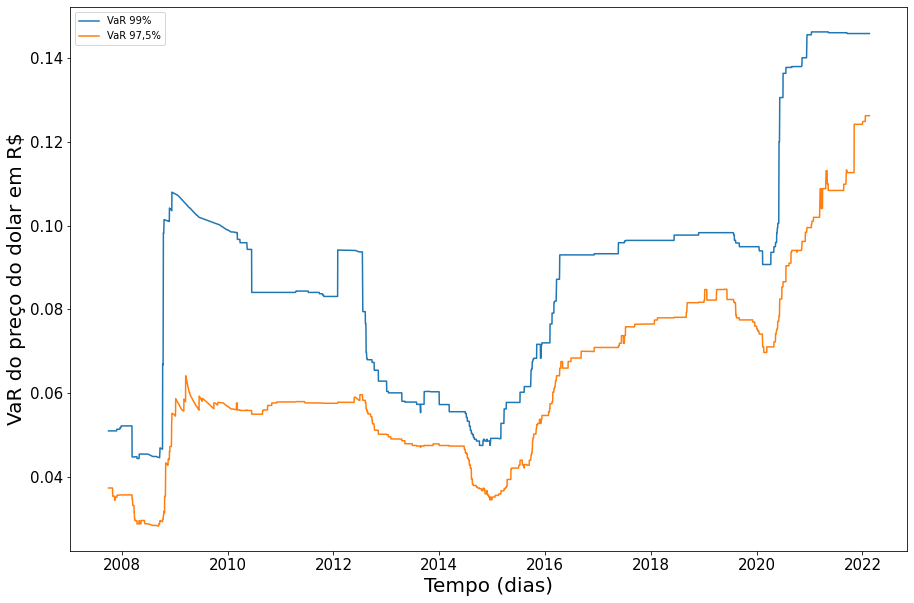

In [5]:
tamanho_hist = 1000
ticker = 'USDBRL=X' #dolar
data = '18/02/2022'
hp = 1

preco_dolar = read_fx_input_modificado(fx_name=ticker, data_fim=data)
retorno_e_pnl = calc_ret_pnl(preco_dolar, hp=hp)
datas = retorno_e_pnl.index[tamanho_hist+hp:len(retorno_e_pnl)]

n_conf1 = 0.99
n_conf2 = 0.975
alpha1 = 1 - n_conf1
alpha2 = 1 - n_conf2

VaRs99 = []
VaRs975 = []

# FOR para percorrer as datas
# For começa no tamanho_hist+hp para que desde o primeiro VaR calculado, tenha amostra de 1000 dias + os dias deslocados de acordo com o hp
# usado no calculo do PnL
for i in range(tamanho_hist+hp,len(retorno_e_pnl)):
    amostra_PnL = retorno_e_pnl.PnL.iloc[i-tamanho_hist:i]
    VaRs99.append(-amostra_PnL.quantile(alpha1))
    VaRs975.append(-amostra_PnL.quantile(alpha2))

plt.figure(figsize=[15,10])
plt.plot(datas, VaRs99, label = "VaR 99%")
plt.plot(datas, VaRs975, label = "VaR 97,5%")
plt.xlabel('Tempo (dias)', fontsize=20)
plt.ylabel('VaR do preço do dolar em R$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend();